In [2]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t

## BÀI TẬP

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.

b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm

c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [22]:
# Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.
n = 10
p = 0.25
size = 10

bi_rand_10 = binom.rvs(n, p, size=size)

bi_rand_10

array([4, 4, 2, 1, 4, 5, 3, 1, 5, 4], dtype=int64)

In [20]:
# Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm
p_2_correct = binom.pmf(k=2, n=10, p=0.25)

print("Xác suất để sinh viên này được 4 điểm là:", p_2_correct.round(4))

Xác suất để sinh viên này được 4 điểm là: 0.2816


In [5]:
# c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)
E_X = binom.mean(n=10, p=0.25) # Mean = E(X) = n*p 
Var_X = binom.var(n=10, p=0.25) # Variance = Var(X) = n*p*(1-p)

print("E(X) =", E_X)
print("Var(X) =", Var_X)

E(X) = 2.5
Var(X) = 1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [19]:
lamda = 3 # lamda là số sự kiện trung bình xảy ra trong 1 khoảng thời gian cố định

calls_pmf_1 = poisson.pmf(k=1, mu=lamda)
calls_pmf_2 = poisson.pmf(k=2, mu=lamda)
calls_pmf_3 = poisson.pmf(k=3, mu=lamda)

print("Xác suất để có 1 cuộc gọi trong 1 phút là:", calls_pmf_1.round(4))
print("Xác suất để có 2 cuộc gọi trong 1 phút là:", calls_pmf_2.round(4))
print("Xác suất để có 3 cuộc gọi trong 1 phút là:", calls_pmf_3.round(4))

Xác suất để có 1 cuộc gọi trong 1 phút là: 0.1494
Xác suất để có 2 cuộc gọi trong 1 phút là: 0.224
Xác suất để có 3 cuộc gọi trong 1 phút là: 0.224


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.

b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu

d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

In [7]:
mu = 500
sigma = 4

In [18]:
# Tỉ lệ của mỗi loại
xs_1 = 1 - norm.cdf(x=505, loc=mu, scale=sigma) # loc = mean = mu, scale = standard deviation = sigma
xs_2 = norm.cdf(x=505, loc=mu, scale=sigma) - norm.cdf(x=495, loc=mu, scale=sigma)
xs_3 = norm.cdf(x=-495, loc=mu, scale=sigma)

print("Tỉ lệ loại 1:", xs_1.round(4))
print("Tỉ lệ loại 2:", xs_2.round(4))
print("Tỉ lệ loại 3:", xs_3)

Tỉ lệ loại 1: 0.1056
Tỉ lệ loại 2: 0.7887
Tỉ lệ loại 3: 0.0


**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

a. Xác suất để  số chấm xuất hiện là 4

b. Xác suất để số chấm xuất hiện lớn hơn hoặc bằng 4

c. Giả sử biết số chấm xuất hiện lớn hơn hoặc bằng 4. Hãy tìm xác suất để mặt 6 chấm xuất hiện.

In [9]:
# Tạo sample
dice_5k_sample = np.random.randint(1, 7, 5000)

In [10]:
# Xác suất để có mặt 4
p_4 = np.mean(dice_5k_sample == 4)
p_geq_4 = np.mean(dice_5k_sample >= 4)

dice_geq_4 = dice_5k_sample[dice_5k_sample >= 4]
p_6_given_geq_4 = np.mean(dice_geq_4 == 6)

print("Xác suất để có mặt 4:", p_4)
print("Xác suất để có mặt >= 4:", p_geq_4)
print("Xác suất để có mặt 6 khi đã có mặt 4 hoặc lớn hơn:", p_6_given_geq_4)

Xác suất để có mặt 4: 0.1596
Xác suất để có mặt >= 4: 0.4954
Xác suất để có mặt 6 khi đã có xác suất mặt 4 hoặc lớn hơn: 0.3358901897456601


**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3

b. Vẽ đồ thị boxplot

c. Vẽ các đồ thị: tần số, tần suất

In [11]:
# Tạo sample
num_bi_5k = binom.rvs(n=50, p=0.7, size=5000)

print("Min:", np.min(num_bi_5k))
print("Max:", np.max(num_bi_5k))
print("Q1:", np.percentile(num_bi_5k, 25))
print("Q2:", np.median(num_bi_5k))
print("Q3:", np.percentile(num_bi_5k, 75))

Min: 22
Max: 46
Q1: 33.0
Q2: 35.0
Q3: 37.0


{'whiskers': [<matplotlib.lines.Line2D at 0x1a8abbfd050>,
 'caps': [<matplotlib.lines.Line2D at 0x1a8abbfe850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a8abb6c3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a8abbffed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a8abc14a50>],
 'means': []}

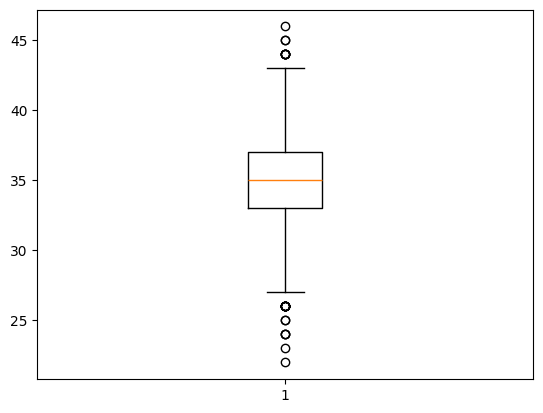

In [12]:
# Vẽ boxplot
plt.boxplot(num_bi_5k)

(array([   2.,    3.,    2.,   11.,   28.,  171.,  178.,  302.,  381.,
         511., 1173.,  619.,  519.,  405.,  284.,  313.,   64.,   25.,
           6.,    3.]),
 array([22. , 23.2, 24.4, 25.6, 26.8, 28. , 29.2, 30.4, 31.6, 32.8, 34. ,
        35.2, 36.4, 37.6, 38.8, 40. , 41.2, 42.4, 43.6, 44.8, 46. ]),
 <BarContainer object of 20 artists>)

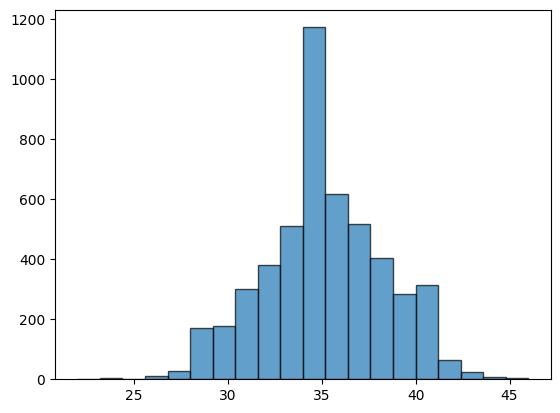

In [15]:
# Vẽ histogram
plt.hist(num_bi_5k, bins=20, alpha=0.7, edgecolor='black')